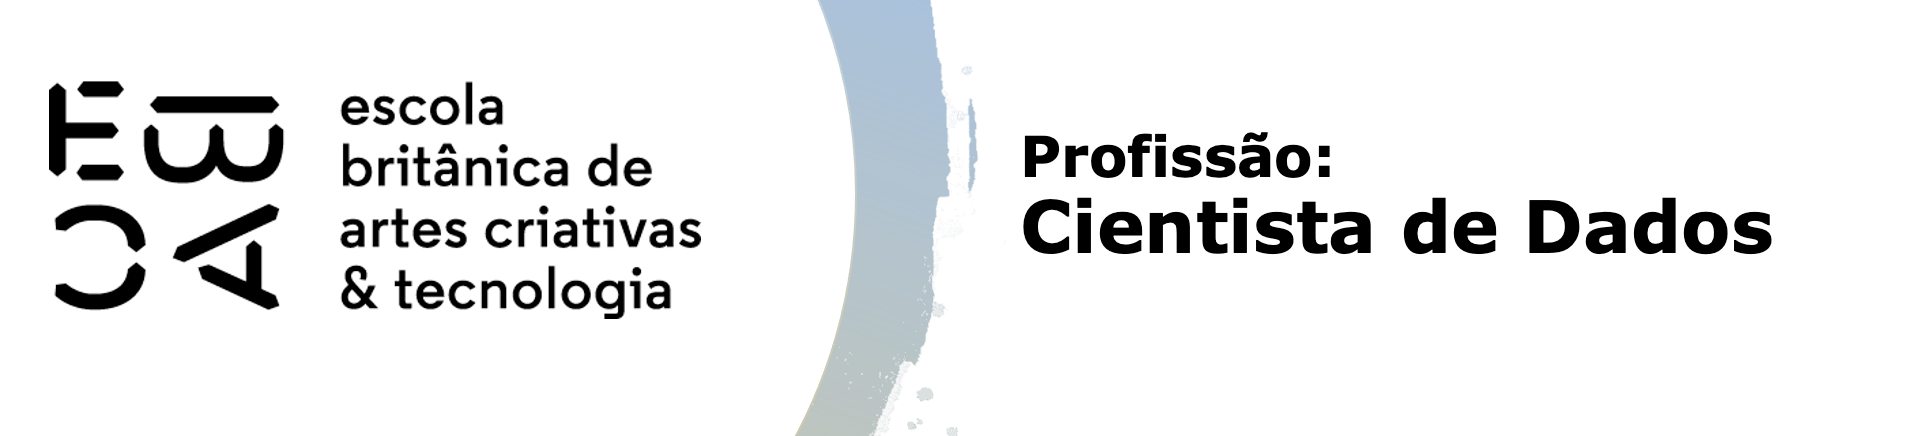

# Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pg = sns.load_dataset('penguins')

In [3]:
pg.groupby('sex')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


<Axes: xlabel='sex', ylabel='body_mass_g'>

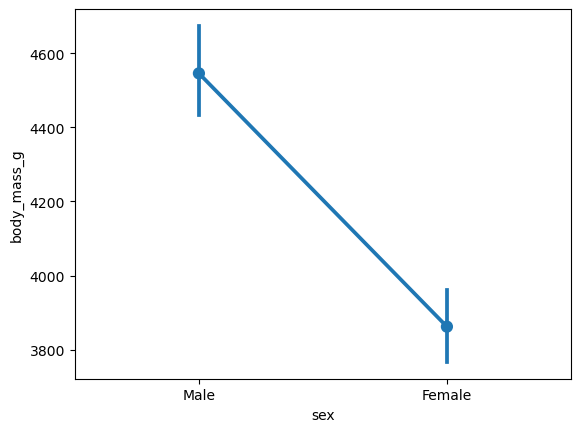

In [4]:
sns.pointplot(data=pg, x='sex', y = 'body_mass_g')

## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

In [5]:
pg.isna().sum() #verificando se há faltantes

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [6]:
pg = pg.dropna(subset=['sex', 'body_mass_g']) #excluindo os faltantes

In [7]:
male_weights = pg[pg['sex'] == 'Male']['body_mass_g']
female_weights = pg[pg['sex'] == 'Female']['body_mass_g']
alpha = 0.05

# Teste T de duas amostras
t_stat, p_value = stats.ttest_ind(male_weights, female_weights)

# Interpretação dos resultados
print("Estatística do teste:", t_stat.round(2))
print("P-Value:", p_value)
if p_value < alpha:
    print("\nRejeitamos a hipótese nula. Há uma diferença significativa no peso entre machos e fêmeas.")
else:
    print("\nNão rejeitamos a hipótese nula.")

Estatística do teste: 8.54
P-Value: 4.897246751596224e-16

Rejeitamos a hipótese nula. Há uma diferença significativa no peso entre machos e fêmeas.


## 2) (opcional) Representação gráfica do teste

Siga os passos da aula para você poder visualizar a estatística do teste, sua distribuição e a região crítica do teste.

In [8]:
#Calculando os graus de liberdade:
df = pg.sex.value_counts().sum() -2
df

331

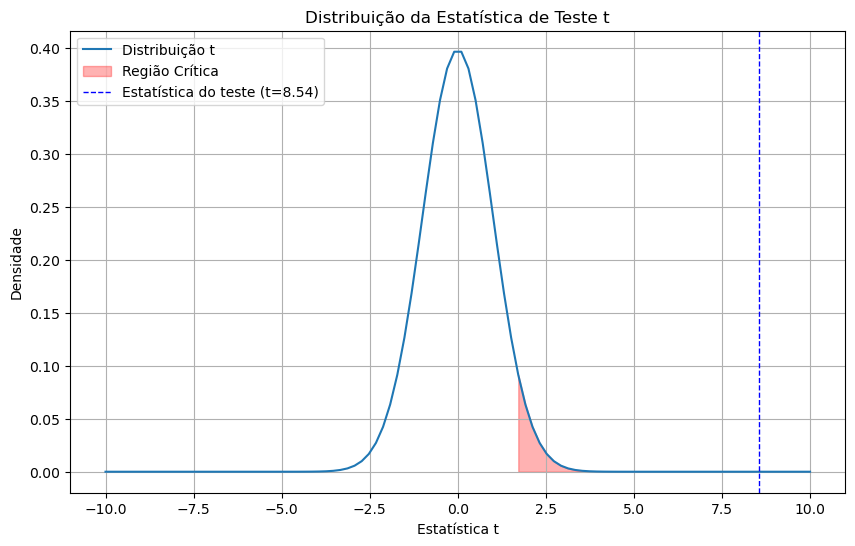

In [9]:
# Parâmetros da densidade sob H0
mu = 0
variance = 1
sigma = variance**.5

# Região crítica: sob H0, t está na RC 5% das vezes
alpha = 0.05
critical_value = stats.t.ppf(1-alpha, df) 

# Valores de X e Y para plotar a densidade
x = np.linspace(-10,10, 100)
y = stats.t.pdf(x, df)

# Distribuição t
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribuição t')

# Preenchimento da Região Crítica
plt.fill_between(x, y, where=(x >= critical_value), color='red', alpha=0.3, label='Região Crítica')

# Linha da estatística do teste
plt.axvline(t_stat, color='blue', linestyle='--', linewidth=1, label=f'Estatística do teste (t={t_stat:.2f})')

plt.title('Distribuição da Estatística de Teste t')
plt.xlabel('Estatística t')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True)
plt.show()

## 3) Considere as espécies

Repita o exercício I, uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

In [11]:
# Lista de espécies
species_list = pg['species'].unique()


for species in species_list:
    print(f"\nEspécie: {species}")
    
    # Pesos dos pinguins por sexo e espécie
    species_data = pg[pg['species'] == species]
    male_weights = species_data[species_data['sex'] == 'Male']['body_mass_g']
    female_weights = species_data[species_data['sex'] == 'Female']['body_mass_g']
    
    # Teste T de duas amostras
    t_stat, p_value = stats.ttest_ind(male_weights, female_weights)
    
    # Interpretação dos resultados
    print("Estatística do teste:", t_stat.round(2))
    print("P-Value:", p_value)
    if p_value < alpha:
        print("Rejeitamos a hipótese nula. Há uma diferença significativa no peso entre machos e fêmeas.")
    else:
        print("Não rejeitamos a hipótese nula.")


Espécie: Adelie
Estatística do teste: 13.13
P-Value: 2.2206436307866114e-26
Rejeitamos a hipótese nula. Há uma diferença significativa no peso entre machos e fêmeas.

Espécie: Chinstrap
Estatística do teste: 5.21
P-Value: 2.043956471470739e-06
Rejeitamos a hipótese nula. Há uma diferença significativa no peso entre machos e fêmeas.

Espécie: Gentoo
Estatística do teste: 14.72
P-Value: 2.133687602018886e-28
Rejeitamos a hipótese nula. Há uma diferença significativa no peso entre machos e fêmeas.


#### Para a espécie Chinstrap, a diferença entre o peso de machos e fêmeas é menos da metade do que nas outras espécies. Porém para todas as espécies existe uma diferença significativa entre machos e fêmeas.